<a href="https://colab.research.google.com/github/Mparate1234/Py_stat_DS_ML/blob/main/Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIME SERIES ANALYSIS USING PYTHON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
plt.rcParams['figure.figsize']=(12,4)
plt.rcParams['axes.grid']=True
plt.rcParams['font.size']=14

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
fx=pd.read_csv('/content/drive/MyDrive/BOE-XUDLERD.csv')
fx.head(3)

,Date,Value
0,09-11-2017,0.8603
1,08-11-2017,0.8631
2,07-11-2017,0.8639


In [5]:
fx=fx[::-1]
fx.head(3)

,Date,Value
10836,02-01-1975,0.7633
10835,03-01-1975,0.7585
10834,06-01-1975,0.7524


In [6]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10837 non-null  object 
 1   Value   10837 non-null  float64
dtypes: float64(1), object(1)
memory usage: 169.5+ KB


In [7]:
# Easiest way to get date column as index

# *****************************************************************************************************************

fx.set_index('Date',inplace=True)
fx

,Value
Date,
02-01-1975,0.7633
03-01-1975,0.7585
06-01-1975,0.7524
07-01-1975,0.7510
08-01-1975,0.7554
...,...
03-11-2017,0.8608
06-11-2017,0.8631
07-11-2017,0.8639


### making sure pandas reads desired columns as data

In [8]:
fx=pd.read_csv('/content/drive/MyDrive/BOE-XUDLERD.csv',parse_dates=['Date'],dayfirst=True)
fx=fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [9]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10837 non-null  datetime64[ns]
 1   Value   10837 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.5 KB


### extract date features

In [10]:
fx['xyz']=fx.Date.dt.hour
fx.head(3)

,Date,Value,xyz
10836,1975-01-02,0.7633,0
10835,1975-01-03,0.7585,0
10834,1975-01-06,0.7524,0


In [11]:
fx=pd.read_csv('/content/drive/MyDrive/BOE-XUDLERD.csv',parse_dates=['Date'],index_col='Date',dayfirst=True)
fx=fx[::-1]     
fx.head(3)

,Value
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524


In [12]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10837 entries, 1975-01-02 to 2017-11-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10837 non-null  float64
dtypes: float64(1)
memory usage: 169.3 KB


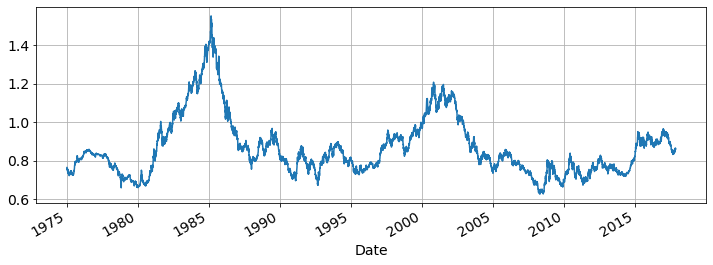

In [13]:
fx.Value.plot()
plt.show()

### Resample - fixed average index

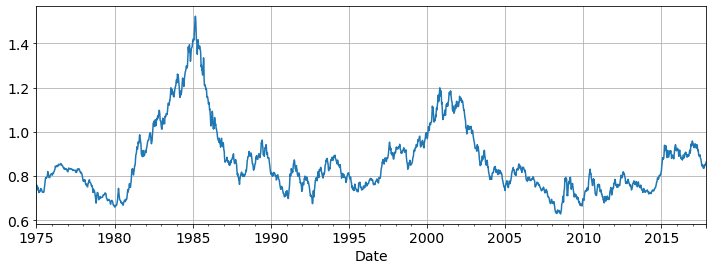

In [14]:
fxw=fx.Value.resample('W').mean()             ## treaming extra portion where graph is not there
fxw.plot()                            ##  W- weekly sample     ,   Y-yearly samplr   ,  D-daily sample    ,  M-monthly sample   
plt.show()

### Rolling - Rolling period average

In [15]:
fx['roll_mean']=fx.Value.rolling(5).mean()  
               #  rolling use mean of '5' days means moving average of 5 days ,to make data smooth
fx.head(10)

,Value,roll_mean
Date,,
1975-01-02,0.7633,NaN
1975-01-03,0.7585,NaN
1975-01-06,0.7524,NaN
1975-01-07,0.7510,NaN
1975-01-08,0.7554,0.75612
1975-01-09,0.7551,0.75448
1975-01-10,0.7534,0.75346
1975-01-13,0.7540,0.75378
1975-01-14,0.7588,0.75534


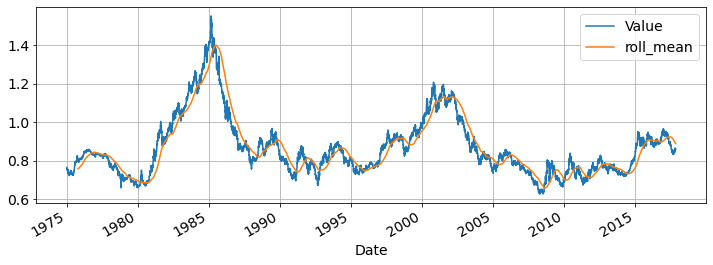

In [16]:
fx['roll_mean']=fx.Value.rolling(200).mean()   # we can see smooth line of moving mean with 200 
fx.plot()                                          # original data has very noise ,, now noise is reduced
plt.show()

# Test for stationarity  - Augmented Dickey Fulled Test
#### p-value : how likely it is to get a result like this if null hpothesis is True
#### Always look at the p-value in context of null hypothesis
#### significance value (alpha): if p-value is below this value we will reject null hypothesis
#### null hypothesis of the dickey fuller test is that the value is non- stationary
#### so we reject the null hypothesis that data is non-stationary if the p-value is less than 0.05

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
adfuller(fxw)[1]

0.25413395509261294

^^^^^^^^  this is " p " value

### Remember Dickey fuller test only trend stationarity .so visualisation of data is not replacable

In [19]:
def test_stationarity(timeseries):
    #determine rolling statistics
    rolmean=timeseries.rolling(window=52).mean()
    rolstd=timeseries.rolling(window=52).std()
    # plot rolling statistics:
    orig=plt.plot(timeseries,label='Original')
    mean=plt.plot(rolmean,label='Rolling mean')
    std=plt.plot(rolstd,label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard daviation')
    plt.show()
    #perform dickey fuller test
    print('Results of Dickey Fuller Test :')
    dftest=adfuller(timeseries)[1]
    print('p-value :',dftest)

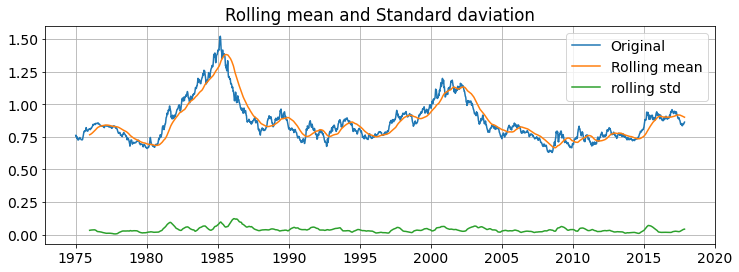

Results of Dickey Fuller Test :
p-value : 0.25413395509261294


In [20]:
test_stationarity(fxw)

***   p-value is >0.05 , so , data is stationary we can use time series analysis

## In case to convert data from non-stationary to stationary
#### diff()=v(t)-v(t-1), sometime multiple times
#### log
#### sqrt
#### proportion=v(t)/v(t-1)
#### often simple solution {diff} is the best one

In [21]:
fxw.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [22]:
fxw.diff().head()       # t=1        # diff -- differencing

Date
1975-01-05        NaN
1975-01-12   -0.00744
1975-01-19    0.00200
1975-01-26   -0.01158
1975-02-02   -0.00486
Freq: W-SUN, Name: Value, dtype: float64

In [23]:
fxw.diff().diff().head()        # t=2

Date
1975-01-05        NaN
1975-01-12        NaN
1975-01-19    0.00944
1975-01-26   -0.01358
1975-02-02    0.00672
Freq: W-SUN, Name: Value, dtype: float64

### lets check for stationarity

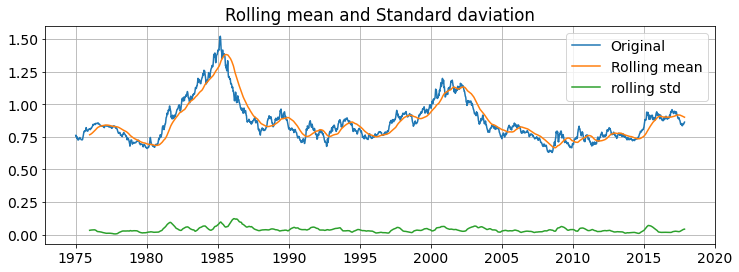

Results of Dickey Fuller Test :
p-value : 0.25413395509261294


In [24]:
test_stationarity(fxw)

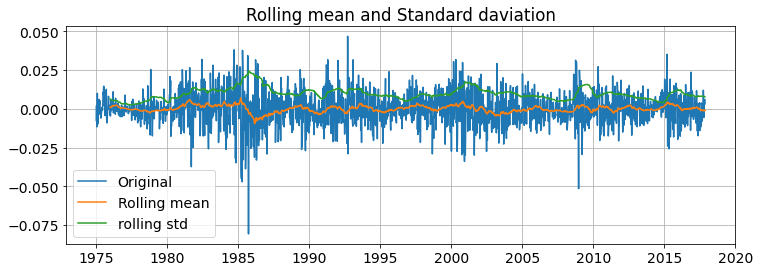

Results of Dickey Fuller Test :
p-value : 0.0


In [25]:
test_stationarity(fxw.diff().dropna())

p value 0 means checking only noise          # white-noise concept

# motivating example to make data stationarity

In [26]:
pas=pd.read_csv("/content/drive/MyDrive/SeaPlaneTravel.csv")

In [27]:

pas.head()


,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [29]:
pas=pd.read_csv("/content/drive/MyDrive/SeaPlaneTravel.csv",parse_dates=['Month'],index_col='Month')
pas.columns=['Passengers']
pas.head(3)

,Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132


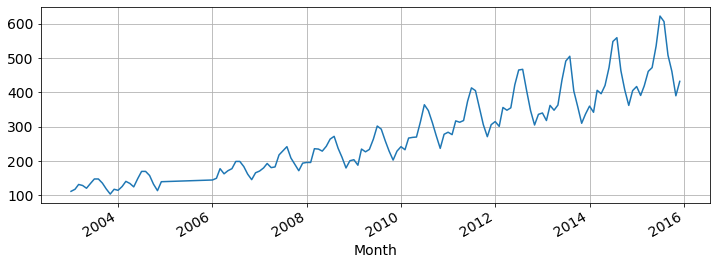

In [30]:
pas.Passengers.plot()
plt.show()

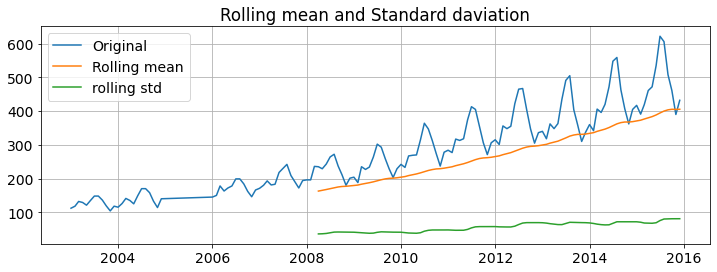

Results of Dickey Fuller Test :
p-value : 0.991880243437641


In [31]:
test_stationarity(pas.Passengers)

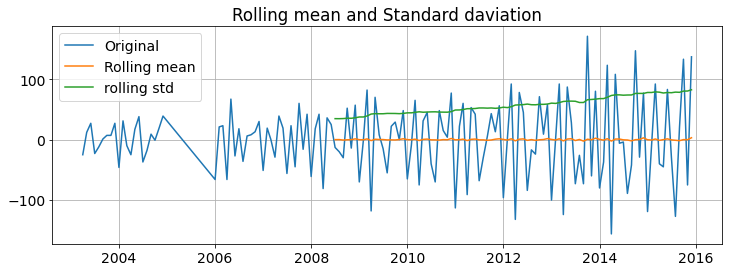

Results of Dickey Fuller Test :
p-value : 5.079966883924158e-16


In [32]:
test_stationarity(pas.Passengers.diff().diff().diff().dropna())

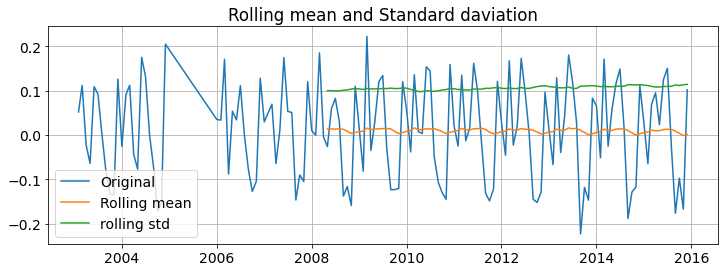

Results of Dickey Fuller Test :
p-value : 0.07112054815086184


In [33]:
test_stationarity(np.log(pas.Passengers).diff().dropna())

### To use ARMA dataset must be stationary

### so 
### ACF - PACF to determine lags the model(AR,MA,ARMA) and lags (p and q)
### autocorelation with previous lags

###   [    we don't use technique now check ARIMA to find (p,d,q)    ]
###  [      this is long method contains much code  ]
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [34]:
fxw_auto=pd.DataFrame(fxw,columns=['Value'])
fxw_auto['t-1']=fxw_auto.Value.shift(1)
fxw_auto['t-2']=fxw_auto.Value.shift(2)
fxw_auto['t-3']=fxw_auto.Value.shift(3)
fxw_auto.head()

,Value,t-1,t-2,t-3
Date,,,,
1975-01-05,0.76090,NaN,NaN,NaN
1975-01-12,0.75346,0.76090,NaN,NaN
1975-01-19,0.75546,0.75346,0.76090,NaN
1975-01-26,0.74388,0.75546,0.75346,0.76090
1975-02-02,0.73902,0.74388,0.75546,0.75346


In [35]:
fxw_auto=fxw_auto.dropna()
fxw_auto.head()

,Value,t-1,t-2,t-3
Date,,,,
1975-01-26,0.74388,0.75546,0.75346,0.76090
1975-02-02,0.73902,0.74388,0.75546,0.75346
1975-02-09,0.74906,0.73902,0.74388,0.75546
1975-02-16,0.74142,0.74906,0.73902,0.74388
1975-02-23,0.73538,0.74142,0.74906,0.73902


In [36]:
fxw_auto.corr()

,Value,t-1,t-2,t-3
Value,1.000000,0.997665,0.994108,0.990445
t-1,0.997665,1.000000,0.997666,0.994110
t-2,0.994108,0.997666,1.000000,0.997666
t-3,0.990445,0.994110,0.997666,1.000000


### Prtial autocorrelation
* remove the effect of previous lag while calculating correlation

In [37]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

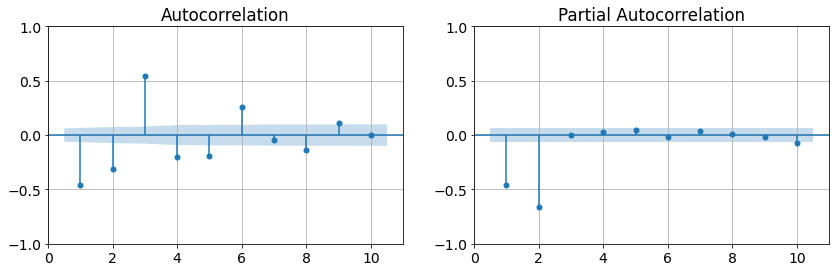

In [38]:
ar_coeffs=[1,0.8,0.7]
ma_coeffs=[1,0]
y=arma_generate_sample(ar_coeffs,ma_coeffs,nsample=1000)
fig,ax=plt.subplots(1,2,figsize=(14,4))
plot_acf(y,lags=10,zero=False,ax=ax[0])
plot_pacf(y,lags=10,zero=False,ax=ax[1])
plt.show()

# If the model is ARMA we have to try differnt models to find the right one

# ARIMA model (p,d,q)
### integrates stationarity
### d is the number of times diff() has to be done to meke the data stationary
### data can be stationary or non-stationary it will automatically convert non-stationary into stationary

In [39]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.2 MB/s eta 0:00:00


In [40]:
import pmdarima as pm

In [41]:
pm.auto_arima(fxw)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [42]:
pm.auto_arima(fxw,information_criterion='bic',trace=True) # all combinations it will buils and gives best of (p,d,q)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=-14161.451, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=-14028.103, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=-14178.993, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=-14183.112, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=-14035.773, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=-14176.856, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=-14176.889, Time=0.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=-14169.164, Time=0.71 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=-14190.797, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=-14184.542, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=-14184.575, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=-14186.682, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=-14176.850, Time=0.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.964 seco

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# ARIMA model implimentation

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
import statsmodels.api as sm

In [45]:
fxw.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [56]:
model=sm.tsa.arima.ARIMA(fxw,order=(0,1,1))
model=sm.tsa.arima.ARIMA(fxw,order=(2,1,2))
result=model.fit()

In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                 2237
Model:                 ARIMA(2, 1, 2)   Log Likelihood                7103.850
Date:                Sat, 25 Mar 2023   AIC                         -14197.699
Time:                        18:50:02   BIC                         -14169.137
Sample:                    01-05-1975   HQIC                        -14187.271
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0336     12.778      0.003      0.998     -25.011      25.078
ar.L2          0.0004      1.149      0.000      1.000      -2.251       2.252
ma.L1          0.2423     12.778      0.019      0.985     -24.802      25.286
ma.L2          0.0150      2.378      0.006      0.995      -4.646       4.676
sigma2         0.0001   2.08e-06     49.061      0.000    9.78e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               652.14
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Making Predictions from the fitted model

In [58]:
fxw.tail()

Date
2017-10-15    0.84628
2017-10-22    0.84798
2017-10-29    0.85326
2017-11-05    0.85936
2017-11-12    0.86260
Freq: W-SUN, Name: Value, dtype: float64

# Forecast:
### prediction into future
### good forecasts are only for next time period

In [59]:
result.forecast(3)

2017-11-19    0.863221
2017-11-26    0.863270
2017-12-03    0.863272
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [60]:
result.forecast(3)[0]

0.8632207292258641

## predict:
### makes predictions on the difference value

In [61]:
len(fxw)

2237

In [62]:
result.predict(2232,2237)

2017-10-15    0.852265
2017-10-22    0.844653
2017-10-29    0.848751
2017-11-05    0.854580
2017-11-12    0.860793
2017-11-19    0.863221
Freq: W-SUN, Name: predicted_mean, dtype: float64

# plot predicts:
### actual vs predicted

In [63]:
import statsmodels
statsmodels.__version__

!pip install statsmodels -- upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


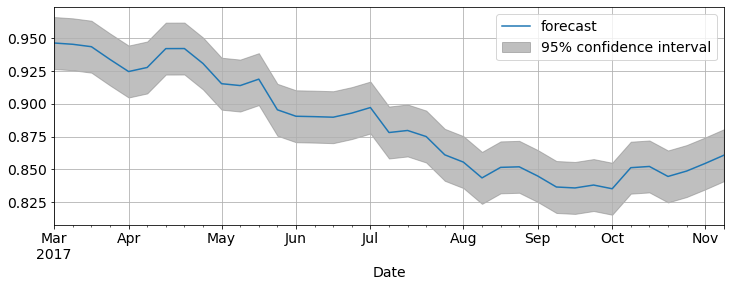

In [64]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result,start=2200)
plt.show()

# RMSE

In [65]:
Errors=result.resid       ## errors we are getting
Errors.tail()

Date
2017-10-15   -0.005985
2017-10-22    0.003327
2017-10-29    0.004509
2017-11-05    0.004780
2017-11-12    0.001807
Freq: W-SUN, dtype: float64

In [66]:
np.sqrt(np.mean((Errors)**2))             # error is very less

0.018990103151695446